In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.signal import find_peaks
from cycler import cycler
from scipy import stats
from tabulate import tabulate
import os
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.prop_cycle':(cycler('color', ['r', 'g', 'b', 'y']) + cycler('ls', ['-', '--', ':', '-.']))}

pylab.rcParams.update(params)

# Startup

In [20]:
# Output sample: ../Task2/Step1_Startup/sampleT94.4.dat
# Number of steps:     800, time step: 0.0046, total time:      3.6800
# Number of atoms:   864
# Box size:   10.228800   10.228800   10.228800, Volume:       1070.222
# Density:    0.807309 (unchanged)
#  Step   Temperature     Kinetic      Potential   Total Energy    Pressure
dt_s = 1e-14 #Timestep in Rahmann's paper
sigma = 3.4e-10 #m
tt = 4.6286E11 
e = 1.602e-19 #J/eV
def LJ2SI_t(du):
    dtdu = (120*1.38e-23/6.69e-26)**-0.5 * 3.4e-10
    return du * dtdu
def steps2SI_t(step_n, dt = 1e-14):
    return step_n*dt
def LJ2SI_T(lj_T):
    return 120.*lj_T
def LJ2SI_d(lj_d):
    return sigma * lj_d
def LJ2SI_vacf(lj_vacf):
    return lj_vacf*LJ2SI_d(1)**2/LJ2SI_t(1)**2
M = 6.69e-26 #kg
Treal = 94.4 #K
kb = 1.38e-23 #m2 kg /s2/K
epsilon = 120 * kb # J

In [21]:

data = np.loadtxt('../data/initial/md_equilib.out')
startup_t = steps2SI_t(data[:,0])
startup_T = LJ2SI_T(data[:,1])
startup_K = data[:,2]
startup_U = data[:,3]
startup_E = data[:,4]
startup_P = data[:,5]

Text(0, 0.5, '$E$')

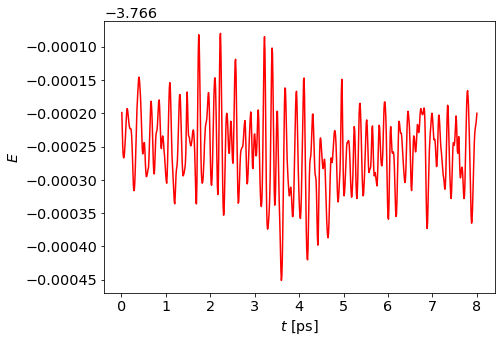

In [22]:
plt.plot(startup_t*1e12, startup_E, label='Energy')
plt.xlabel('$t$ [ps]')
plt.ylabel('$E$')

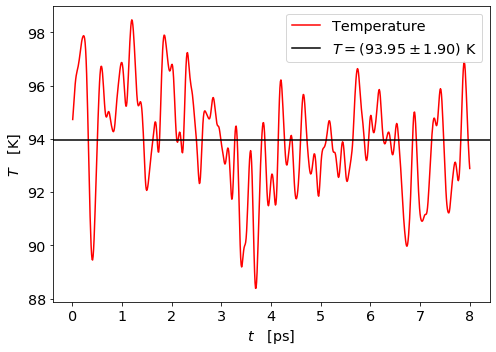

In [23]:
plt.plot(startup_t*1e12, startup_T, label='Temperature')
plt.axhline(np.mean(startup_T), label=r'$T =(%.2f\pm%.2f)$ K'%(np.mean(startup_T), np.std(startup_T)), color = 'k')
plt.xlabel('$t\quad$[ps]')
plt.ylabel('$T\quad$[K]')
plt.legend()
plt.gcf()
plt.tight_layout()
plt.savefig('../results/Tvst.png', dpi=200)

# Static

In [24]:
g_S_file = open('../data/initial/sample21.dat.samp', 'r')
linebreaks = []
for i, line in enumerate(g_S_file.readlines()):
    if '#' in line:
        linebreaks.append(i)
print(linebreaks)
g_S_file.close()   
g_S_file = open('../data/initial/sample21.dat.samp', 'r')
g_file = open('../data/initial/gofr_split.dat', 'w')
S_file = open('../data/initial/sofk_split.dat', 'w')
for i, line in enumerate(g_S_file.readlines()):
    if i > linebreaks[1] and i < linebreaks[2]:
        g_file.write(line)
    elif i > linebreaks[3]:
        S_file.write(line)
g_file.close()
S_file.close()
g_S_file.close()

[0, 1, 503, 504]


In [25]:
g = np.loadtxt('../data/initial/gofr_split.dat')
S = np.loadtxt('../data/initial/sofk_split.dat')

No handles with labels found to put in legend.


[ 3.7038478  7.112086  10.137763  13.5112226 16.5368996] [2.849135 1.26145  1.086788 1.034894 1.014245]


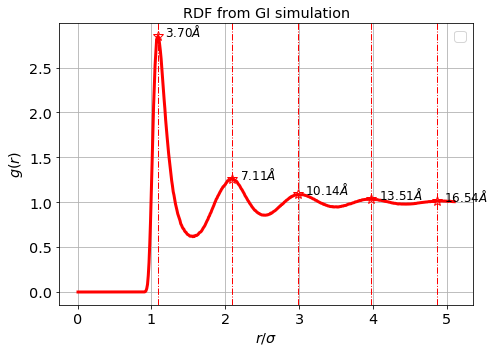

In [61]:
def find_plot_peaks(x, y, ax=plt.figure().gca(), peak_dist = 50, **kwargs):
    if not 'marker' in kwargs.keys():
        kwargs['marker'] = 'o'
    if not 'label' in kwargs.keys():
        kwargs['label'] = 'f(x)'
    label = kwargs['label']
    peak_id, _ = find_peaks(y, distance=peak_dist)
    x_max = x[peak_id]
    y_max = y[peak_id]
    ax.plot(x, y, label=label, lw=3)
    ax.plot(x_max, y_max, lw=0, **kwargs)
    [ax.axvline(i, lw = 1, ls = '-.', c = kwargs['c']) for i in x_max]
    plt.legend()
    plt.grid()
    return x_max, y_max


# Find maxima in g
r_max, g_max = find_plot_peaks(g[:, 0],
                               g[:, 1],
                               label='',
                               marker='*',
                               c='r',
                               markersize=10, fillstyle='none')
plt.xlabel('$r/\sigma$')
plt.ylabel('$g(r)$')
print(LJ2SI_d(r_max) * 1e10, g_max)
for i in range(len(r_max)):
    plt.text(r_max[i] + 0.1,
             g_max[i],
             '%.2f$\AA$' % (LJ2SI_d(r_max[i]) * 1e10),
             fontsize=12)
plt.title('RDF from GI simulation')
plt.gcf()
plt.tight_layout()
plt.savefig('../results/gofr.png', dpi=200)

[ 1.505017  6.722408 12.541806 18.361204 24.481605] [0.107732 2.452703 1.254759 1.099069 1.042958]
[ 1.254181  6.772575 12.391304 18.311037 24.832776] [0.05873  2.493405 1.262136 1.098524 1.044001]
[5.76773971 3.00373618 2.10725286 1.58111747 1.29182801]


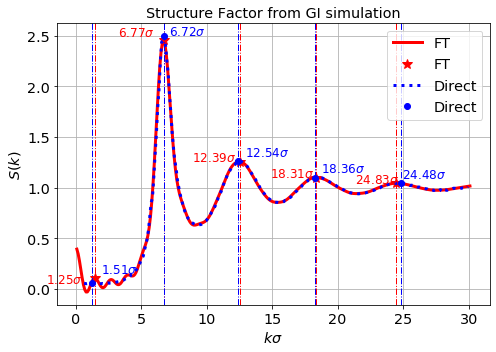

In [27]:
plt.figure()
# Find maxima in S
k_max, S_max = find_plot_peaks(S[:, 0],
                               S[:, 1],
                               plt.gca(),
                               label='FT',
                               markersize=10,
                               marker='*',
                               c='r')
print(k_max, S_max)
S_direct = np.loadtxt('../data/initial/sample22.dat.samp')
k_max_dir, S_max_dir = find_plot_peaks(S_direct[:, 0],
                                       S_direct[:, 1],
                                       plt.gca(),
                                       label='Direct',
                                       c='b',
                                       marker='o')
print(k_max_dir, S_max_dir)
plt.xlabel('$k\sigma$')
plt.ylabel('$S(k)$')
for i in range(len(k_max)):
    plt.text(k_max[i] + 0.4,
             S_max[i] + 0.05,
             '%.2f$\sigma$' % (k_max[i]),
             color='b',
             fontsize=12)
    plt.text(k_max_dir[i] - 3.5,
             S_max_dir[i],
             '%.2f$\sigma$' % (k_max_dir[i]),
             color='r',
             fontsize=12)
plt.title('Structure Factor from GI simulation')
plt.grid()
plt.gcf()
plt.tight_layout()
plt.savefig('../results/sofk.png', dpi=200)
print(2 * np.pi / r_max)

# Task 6 plots
## How do I know a configuration is equilibrated?

In [28]:
TASK6RESULTS = '/home/daniel/gdrive/EPFL/2019-2020/ComputerSimulation/Tasks/task6/Task6/Step3'
a = np.loadtxt(os.path.join(TASK6RESULTS,'lj.gofr'));
b = np.loadtxt(os.path.join(TASK6RESULTS,'lj.sofk'));


No handles with labels found to put in legend.


[ 3.73879435  7.04284517 10.17299858 13.4770494  16.78110022] [2.76960369 1.25265649 1.08443052 1.03503233 1.01513257]


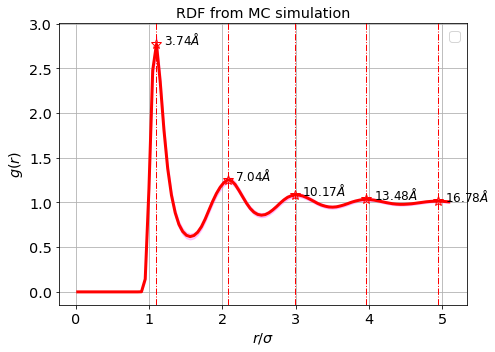

In [59]:
plt.figure()
r_max_mc, g_max_mc = find_plot_peaks(a[0, 1:],
                                     np.mean(a[1:, 1:], axis=0),
                                     plt.gca(),
                                     label='',
                                     marker='*',
                                     c='r',
                                     markersize=10,
                                     fillstyle='none',
                                     peak_dist=10)
g_mc_std = np.std(a[1:, 1:], axis=0)
plt.fill_between(a[0, 1:],
                 np.mean(a[1:, 1:], axis=0) - g_mc_std,
                 np.mean(a[1:, 1:], axis=0) + g_mc_std,
                 alpha=0.2, color='magenta')
plt.xlabel('$r/\sigma$')
plt.ylabel('$g(r)$')
print(LJ2SI_d(r_max_mc) * 1e10, g_max_mc)
for i in range(len(r_max)):
    plt.text(r_max_mc[i] + 0.1,
             g_max_mc[i],
             '%.2f$\AA$' % (LJ2SI_d(r_max_mc[i]) * 1e10),
             fontsize=12)
plt.title('RDF from MC simulation')
plt.gcf()
plt.tight_layout()
plt.savefig('../results/gofr_mc.png', dpi=200)

No handles with labels found to put in legend.


[ 1.51515152  6.66666667 12.42424242 18.18181818 24.54545455] [0.09189085 2.43319547 1.23950464 1.09314774 1.03866073]


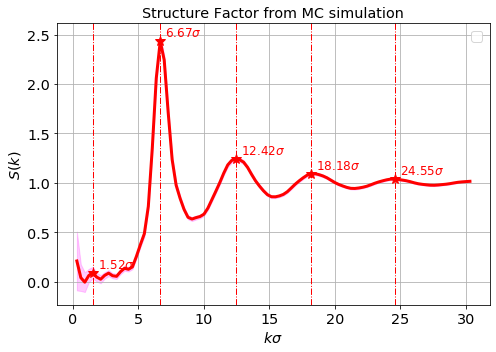

In [30]:
plt.figure()
# Find maxima in S
k_max_mc, S_max_mc = find_plot_peaks(b[0, 1:],
                                     np.mean(b[1:, 1:], axis=0),
                                     plt.gca(),
                                     label='',
                                     markersize=10,
                                     marker='*',
                                     c='r', peak_dist=10)
s_mc_std = np.std(b[1:, 1:], axis=0)
plt.fill_between(b[0, 1:],
                 np.mean(b[1:, 1:], axis=0) - s_mc_std,
                 np.mean(b[1:, 1:], axis=0) + s_mc_std,
                 alpha=0.2, color = 'magenta')
print(k_max_mc, S_max_mc)
plt.xlabel('$k\sigma$')
plt.ylabel('$S(k)$')
for i in range(len(k_max_mc)):
    plt.text(k_max_mc[i] + 0.4,
             S_max_mc[i] + 0.05,
             '%.2f$\sigma$' % (k_max_mc[i]),
             color='r',
             fontsize=12)
plt.title('Structure Factor from MC simulation')
plt.grid(True)
plt.gcf()
plt.tight_layout()
plt.savefig('../results/sofk_mc.png', dpi=200)

In [31]:
out_data = np.loadtxt(os.path.join(TASK6RESULTS, 'lj.prt'))
E_out_mc = out_data[:,1]
P_out_mc = out_data[:,2]

-9.574346949380865e-21
4.3611579720736986e-23


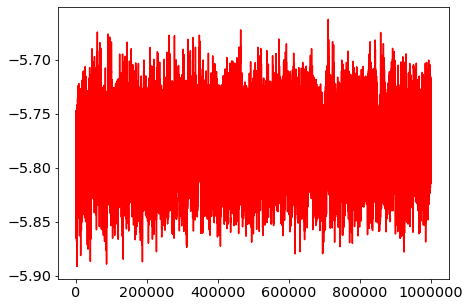

In [32]:
plt.plot(E_out_mc)
print(np.mean(E_out_mc)*epsilon)
print(np.std(E_out_mc)*epsilon)

687.3401331769177
0.13429836949147397


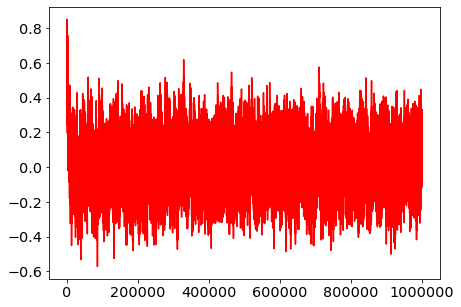

In [33]:
plt.plot(P_out_mc)
print(np.mean(P_out_mc)*(sigma_P*epsilon/(sigma**3)))
print(np.std(P_out_mc))

# Block Analysis

[4.36190400e-26 6.14872800e-26 8.65591200e-26 1.21417920e-25
 1.69077600e-25 2.32502400e-25 3.12868080e-25 4.09843440e-25
 5.18957280e-25 6.47363520e-25 7.84149120e-25 9.26018640e-25
 1.06722576e-24 1.23093792e-24 1.25165448e-24 1.07936424e-24
 7.19946000e-25 8.67528720e-25 7.98970320e-25]


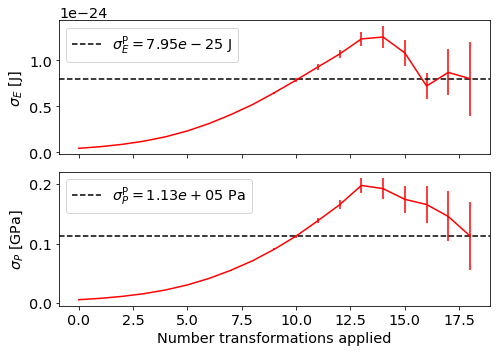

In [34]:
block_data = np.loadtxt(os.path.join(TASK6RESULTS, 'block_results.dat'), skiprows=25)
fig, ax = plt.subplots(2, 1, sharex = True)
#[a.set_yscale('log') for a in ax]
ax[0].errorbar(block_data[:,0], block_data[:,1]*epsilon, yerr=block_data[:,2]*epsilon)
ax[0].set_ylabel('$\sigma_E$ [J]')
ax[1].errorbar(block_data[:,0], block_data[:,3]*epsilon/(sigma**3)/1e6, yerr=block_data[:,4]*epsilon/(sigma**3)/1e6)
ax[1].set_ylabel('$\sigma_P$ [GPa]')
ax[1].set_xlabel('Number transformations applied')
sigma_E = np.mean(block_data[-3:,1])
sigma_P = np.mean(block_data[-1,3])
ax[0].axhline(sigma_E*epsilon, ls = '--', c = 'k', label = '$\sigma_E^{\mathrm{P}}=%.2e~$J'%(sigma_E*epsilon))
ax[1].axhline(sigma_P*epsilon/(sigma**3)/1e6, ls = '--', c = 'k', label = '$\sigma_P^{\mathrm{P}}=%.2e$ Pa'%(sigma_P*epsilon/(sigma**3)))
[a.legend(loc=0) for a in ax]
plt.tight_layout()

plt.gcf()
#plt.savefig('../results/block_analysis.png' ,dpi=200)
print(block_data[:,1]*epsilon)

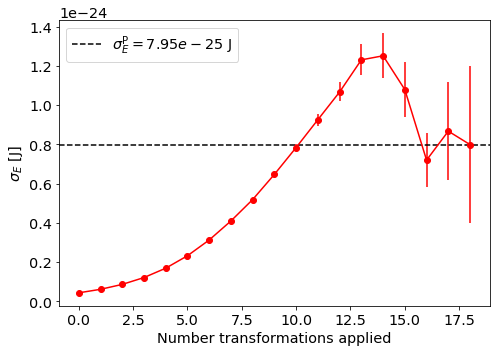

In [35]:
fig, ax = plt.subplots(1, 1, sharex = True)
#[a.set_yscale('log') for a in ax]
ax.errorbar(block_data[:,0], block_data[:,1]*epsilon, yerr=block_data[:,2]*epsilon, marker = 'o')
ax.set_ylabel('$\sigma_E$ [J]')
ax.set_xlabel('Number transformations applied')
sigma_E = np.mean(block_data[-3:,1])
sigma_P = np.mean(block_data[-1,3])
ax.axhline(sigma_E*epsilon, ls = '--', c = 'k', label = '$\sigma_E^{\mathrm{P}}=%.2e~$J'%(sigma_E*epsilon))
ax.legend(loc=0)
plt.tight_layout()

plt.gcf()
plt.savefig('../results/block_analysis.png' ,dpi=200)

# Dynamical

In [36]:
data = np.loadtxt('../data/initial/sample.sum')
t = data[:,0]
msd = data[:,1]/19
vacf = data[:,2]/19 #Have to divide over number of simulations

In [37]:
# Approximate integral with trapezoids.
D_trapz = np.trapz(LJ2SI_vacf(vacf), x=LJ2SI_t(t)) #m^2/s
D_trapz

2.5664573309032065e-09

In [38]:
dcoeff = np.loadtxt('../data/initial/Dcoeff.dat')
D_gnup = np.mean(dcoeff[:,0]) 
print(D_gnup)
std_D_gnup = np.std(dcoeff[:,0])
print(std_D_gnup)

2.526687676653106e-05
2.1348613148982964e-06


2.557180951154785e-09 0.9999364516131638 0.00046674968214331376


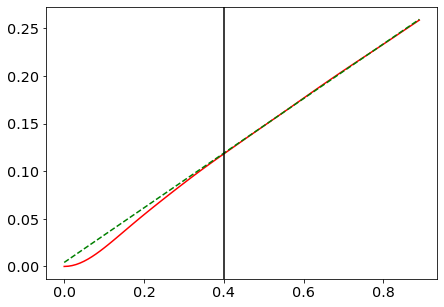

In [39]:
lin_reg_start = 40
slope, intercept, r_value, p_value, std_err = stats.linregress(t[lin_reg_start:], msd[lin_reg_start:])
plt.plot(t, msd )
plt.plot(t, slope*t+intercept)
plt.axvline(t[lin_reg_start], c = 'k')
D_myfit = slope*LJ2SI_d(1)**2/LJ2SI_t(1) / 6 # m^2/s
print(D_myfit, r_value, std_err)

In [40]:
# Fit and plot
def fit_D(d, fit_start=15, main=False):
    t = d[:, 0]
    msd = d[:, 1]
    if main:
        msd = msd / 19
        alpha = 1
        c = 'b'
        lw = 3
        plt.text(LJ2SI_t(t)[fit_start] * 1e12,
                 2,
                 '$t = %.1f$ ps' % (LJ2SI_t(t)[fit_start] * 1e12),
                 fontsize=12)
    else:
        alpha = 0.15
        c = 'r'
        lw = 2
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        t[lin_reg_start:], msd[lin_reg_start:])
    plt.plot(LJ2SI_t(t) * 1e12,
             msd * LJ2SI_d(1)**2 * 1e20,
             c=c,
             alpha=alpha,
             ls='-',
             lw=lw)
    plt.axvline(LJ2SI_t(t)[fit_start] * 1e12, lw=1, ls="-.", c='b', alpha=0.5)
    #plt.plot(t, slope*t+intercept, alpha=alpha, c = c)
    D_fit = slope * LJ2SI_d(1)**2 / LJ2SI_t(1) / 6  # m^2/s
    C_fit = intercept * LJ2SI_d(1)**2
    plt.xlabel('$t$ [ps]')
    plt.ylabel('MSD [$\AA^2$]')
    return D_fit, C_fit

2.557180951154785e-09 2.555435929417708e-09 2.423021652319049e-10


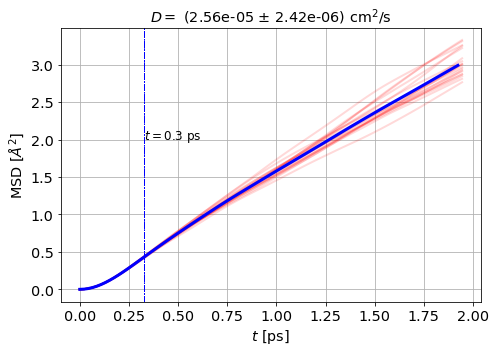

In [41]:
Ds = []
for i in range(19):
    d = np.loadtxt('../data/initial/sample.dat%i.samp'%i)
    Ds.append(fit_D(d))
Ds =np.array(Ds)
D_avg = np.mean(Ds[:,0])
D_std = np.std(Ds[:,0])
D_main, C_main = fit_D(data, main=True)
print(D_main, D_avg, D_std)
plt.title('$D =$ (%0.2e $\pm$ %0.2e) cm$^2$/s'%(D_main*1e4, D_std*1e4))
plt.grid()
plt.gcf()
plt.tight_layout()
plt.savefig('../results/msdvst.png', dpi=200)

In [42]:
def integrate_D(d, main=False):
    t = d[:,0]
    vacf = d[:,2]
    if main:
        vacf= vacf/19
        alpha = 1
        c = 'b'
        lw = 3
    else:
        alpha=0.2
        c = 'r'
        lw=2
    D_trapz = np.trapz(LJ2SI_vacf(vacf), x=LJ2SI_t(t)) #m^2/s
    plt.plot(LJ2SI_t(t)*1e12, LJ2SI_vacf(vacf)/np.max(LJ2SI_vacf(vacf)), c=c, lw=lw, alpha=alpha, ls = '-')
    return D_trapz, LJ2SI_vacf(vacf)[0]

2.5664573309032065e-09 2.5656727169679505e-09 2.9983664572747797e-10


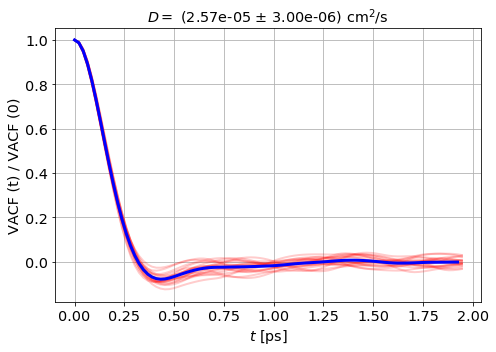

In [43]:
D_int=[]
max_vacfs=[]
for i in range(19):
    d = np.loadtxt('../data/initial/sample.dat%i.samp'%i)
    D, max_vacf = integrate_D(d) 
    D_int.append(D)
    max_vacfs.append(max_vacf)
D_int = np.array(D_int)
D_int_main, _ = integrate_D(data, main=True)
D_int_avg = np.mean(D_int)
D_int_std = np.std(D_int)
print(D_int_main, D_int_avg, D_int_std)

plt.title('$D =$ (%0.2e $\pm$ %0.2e) cm$^2$/s'%(D_int_main*1e4, D_int_std*1e4))
plt.xlabel('$t$ [ps]')
plt.ylabel('VACF (t) / VACF (0)')
plt.grid()
plt.gcf()
plt.tight_layout()
plt.savefig('../results/vacfvst.png', dpi=200)

In [44]:
max_vacf_mean = np.mean(np.array(max_vacfs)*M/kb/Treal)
max_vacf_std = np.std(np.array(max_vacfs)*M/kb/Treal)
print('VACF(t=0)*m /kb*T = %.3f +/- %.3f'%(max_vacf_mean, max_vacf_std))

VACF(t=0)*m /kb*T = 0.986 +/- 0.012


## Rahmann's results on static properties

In [45]:
rahmann_gofr_peaks = np.array([3.7, 7, 10.4]) #Angstrom
rahmann_sofk_peaks = np.array([6.8, 12.5, 18.5, 24.8]) #ksigma
rahmann_D = 2.43e-5 #cm**2/s

In [46]:
err_perc_gofr = 100*abs(np.pad(rahmann_gofr_peaks,
                        (0, len(r_max) - len(rahmann_gofr_peaks)),
                        constant_values=np.nan) -
                 LJ2SI_d(r_max) * 1e10) / (LJ2SI_d(r_max) * 1e10)
print(err_perc_gofr)

[0.10388656 1.57599332 2.58673437        nan        nan]


In [47]:
err_perc_gofr_mc = 100*abs(np.pad(rahmann_gofr_peaks,
                        (0, len(r_max_mc) - len(rahmann_gofr_peaks)),
                        constant_values=np.nan) -
                 LJ2SI_d(r_max_mc) * 1e10) / (LJ2SI_d(r_max_mc) * 1e10)
print(err_perc_gofr_mc)

[1.03761658 0.60835031 2.2314111         nan        nan]


In [48]:
err_perc_gofr_both = 100*abs(LJ2SI_d(r_max_mc) * 1e10 -
                 LJ2SI_d(r_max) * 1e10) / (LJ2SI_d(r_max) * 1e10)
print(err_perc_gofr_both)

[0.94352014 0.97356569 0.3475676  0.25292455 1.47670136]


In [49]:
err_perc_sofk = 100 * abs(np.pad(rahmann_sofk_peaks,
                              (1, len(k_max) - len(rahmann_sofk_peaks)-1),
                              constant_values=np.nan) - k_max) / k_max
print(err_perc_sofk)
print(np.nanmean(err_perc_sofk))

[       nan 1.15422926 0.33333317 0.75591993 1.3005479 ]
0.8860075652630093


In [50]:
err_perc_sofk_dir = 100 * abs(np.pad(rahmann_sofk_peaks,
                              (1, len(k_max_dir) - len(rahmann_sofk_peaks)-1),
                              constant_values=np.nan) - k_max_dir) / k_max_dir
print(err_perc_sofk_dir)
print(np.nanmean(err_perc_sofk_dir))

[       nan 0.40494199 0.87719581 1.03196231 0.13198685]
0.6115217417388797


In [51]:
err_perc_sofk_mc = 100 * abs(np.pad(rahmann_sofk_peaks,
                              (1, len(k_max_mc) - len(rahmann_sofk_peaks)-1),
                              constant_values=np.nan) - k_max_mc) / k_max_mc
print(err_perc_sofk_mc)
print(np.nanmean(err_perc_sofk_mc))

[       nan 2.         0.6097561  1.75       1.03703704]
1.3491982836494993


In [52]:
err_perc_sofk_mc_dir = 100 * abs(k_max_dir - k_max_mc) / k_max_mc
print(err_perc_sofk_mc_dir)
print(np.nanmean(err_perc_sofk_mc_dir[1:]))

[17.224054    1.588625    0.26511415  0.7107035   1.17056889]
0.9337528838075797


In [53]:
err_perc_sofk_mc_ft = 100 * abs(k_max - k_max_mc) / k_max_mc
print(err_perc_sofk_mc_ft)
print(np.nanmean(err_perc_sofk_mc_ft[1:]))

[0.668878   0.83612    0.94624341 0.986622   0.26012778]
0.7572782981029801


In [54]:
err_perc_sofk_both = 100 * abs(k_max - k_max_dir) / k_max_dir
print(err_perc_sofk_both)
print(np.nanmean(err_perc_sofk_both[1:]))

[19.99998405  0.74073746  1.21457758  0.27397138  1.41414315]
0.9108573900684054


In [55]:
headers = [
    '$(k\sigma)_{\mathrm{R}}$', '\% e$_{\mathrm{R-FT}}$', '\% e$_{\mathrm{R-D}}$',
    '\% e$_{\mathrm{R-MC}}$', '\% e$_{\mathrm{D-MC}}$', '\% e$_{\mathrm{FT-MC}}$'
]
print(
    tabulate(np.array([
        rahmann_sofk_peaks, err_perc_sofk[1:], err_perc_sofk_dir[1:],
        err_perc_sofk_mc[1:], err_perc_sofk_mc_dir[1:], err_perc_sofk_mc_ft[1:]
    ]).T,
             headers=headers,
             tablefmt="latex_raw",
             floatfmt=".2f"))

\begin{tabular}{rrrrrr}
\hline
   $(k\sigma)_{\mathrm{R}}$ &   \% e$_{\mathrm{R-FT}}$ &   \% e$_{\mathrm{R-D}}$ &   \% e$_{\mathrm{R-MC}}$ &   \% e$_{\mathrm{D-MC}}$ &   \% e$_{\mathrm{FT-MC}}$ \\
\hline
                       6.80 &                     1.15 &                    0.40 &                     2.00 &                     1.59 &                      0.84 \\
                      12.50 &                     0.33 &                    0.88 &                     0.61 &                     0.27 &                      0.95 \\
                      18.50 &                     0.76 &                    1.03 &                     1.75 &                     0.71 &                      0.99 \\
                      24.80 &                     1.30 &                    0.13 &                     1.04 &                     1.17 &                      0.26 \\
\hline
\end{tabular}


In [56]:
err_perc_D_vacf = 100 * (rahmann_D - D_int_main*1e4) / (D_int_main*1e4)
print(err_perc_D_vacf)

-5.316953033276545


In [57]:
err_perc_D_msd = 100 * (rahmann_D - D_main*1e4) / (D_main*1e4)
print(err_perc_D_msd)

-4.9734826586031


In [58]:
from scipy import stats
stats.ttest_ind(Ds[:,0], D_int, equal_var=False)

Ttest_indResult(statistic=-0.11266071079836504, pvalue=0.9109529019476839)